In [1]:
from sklearn.metrics import f1_score

In [2]:
from src.fewshot_ner_viz_component.data_processing import *
from src.fewshot_ner_viz_component.utils import *
from src.fewshot_ner_viz_component.fewshot_ner_binary_classifier import *
from src.fewshot_ner_viz_component.ne_sim_visualizer import *

/home/kostrovskiy/prog/AI/NLP/DeepPavlov/env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
[nltk_data] Downloading package punkt to
[nltk_data]     /home/kostrovskiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kostrovskiy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/kostrovskiy/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/kostrovskiy/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
2018-09-03 13:17:00.950 DEBU

In [3]:
N_EXAMPLES = 10
N_TEST_SENTENCES = 10

In [4]:
dataset_orig = read_data()
ne_type = 'PERSON'
dataset = filter_dataset_by_ne_types(dataset_orig, ne_type)

Num of train sentences: 75187
Num of valid sentences: 9603
Num of test sentences: 9479
[(['Actions', 'had', 'to', 'be', 'taken', 'to', 'break', 'through', 'the', 'blockade', '.'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']), (['On', 'a', 'night', 'in', 'late', 'July', '1940', ',', 'the', 'atmosphere', 'in', 'Zhuanbi', 'Village', 'in', 'Shaanxi', 'was', 'unusual', '.'], ['O', 'B-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'O', 'O', 'O', 'O', 'B-GPE', 'I-GPE', 'O', 'B-GPE', 'O', 'O', 'O']), (['Villager', 'Xiao', 'Jianghe', 'has', 'a', 'vivid', 'memory', 'of', 'this', 'piece', 'of', 'history', '.'], ['O', 'B-PERSON', 'I-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']), (['On', 'that', 'dark', 'night', ',', 'everyone', 'was', 'sleeping', 'when', 'human', 'voices', 'and', 'neighing', 'horses', 'were', 'heard', 'within', 'the', 'village', '.'], ['O', 'B-TIME', 'I-TIME', 'I-TIME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [5]:
embedder = CompositeEmbedder(use_elmo=True, elmo_scale=1, use_cap_feat=True, use_glove=True)

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.


2018-09-03 13:17:16.171 INFO in 'tensorflow'['tf_logging'] at line 160: Using /tmp/tfhub_modules to cache modules.


INFO:tensorflow:Initialize variable module/aggregation/scaling:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/scaling


2018-09-03 13:17:16.542 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/aggregation/scaling:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/scaling


INFO:tensorflow:Initialize variable module/aggregation/weights:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/weights


2018-09-03 13:17:16.548 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/aggregation/weights:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/weights


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_0


2018-09-03 13:17:16.554 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_0


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_1:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_1


2018-09-03 13:17:16.559 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_1:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_1


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_2:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_2


2018-09-03 13:17:16.568 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_2:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_2


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_3:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_3


2018-09-03 13:17:16.575 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_3:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_3


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_4:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_4


2018-09-03 13:17:16.580 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_4:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_4


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_5:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_5


2018-09-03 13:17:16.586 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_5:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_5


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_6:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_6


2018-09-03 13:17:16.591 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_6:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_6


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_0


2018-09-03 13:17:16.598 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_0


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_1:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_1


2018-09-03 13:17:16.605 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_1:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_1


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_2:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_2


2018-09-03 13:17:16.611 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_2:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_2


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_3:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_3


2018-09-03 13:17:16.621 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_3:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_3


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_4:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_4


2018-09-03 13:17:16.629 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_4:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_4


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_5:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_5


2018-09-03 13:17:16.638 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_5:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_5


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_6:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_6


2018-09-03 13:17:16.645 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_6:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_6


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/W_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_carry


2018-09-03 13:17:16.651 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_0/W_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/W_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_transform


2018-09-03 13:17:16.658 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_0/W_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/b_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_carry


2018-09-03 13:17:16.666 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_0/b_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/b_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_transform


2018-09-03 13:17:16.673 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_0/b_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/W_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_carry


2018-09-03 13:17:16.682 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_1/W_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/W_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_transform


2018-09-03 13:17:16.689 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_1/W_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/b_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_carry


2018-09-03 13:17:16.697 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_1/b_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/b_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_transform


2018-09-03 13:17:16.703 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_1/b_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_proj/W_proj:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/W_proj


2018-09-03 13:17:16.709 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_proj/W_proj:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/W_proj


INFO:tensorflow:Initialize variable module/bilm/CNN_proj/b_proj:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/b_proj


2018-09-03 13:17:16.717 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_proj/b_proj:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/b_proj


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


2018-09-03 13:17:16.723 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


2018-09-03 13:17:16.731 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


2018-09-03 13:17:16.739 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


2018-09-03 13:17:16.748 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


2018-09-03 13:17:16.754 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


2018-09-03 13:17:16.760 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


2018-09-03 13:17:16.766 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


2018-09-03 13:17:16.772 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


2018-09-03 13:17:16.779 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


2018-09-03 13:17:16.785 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


2018-09-03 13:17:16.791 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


2018-09-03 13:17:16.798 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/char_embed:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/char_embed


2018-09-03 13:17:16.804 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/char_embed:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/char_embed
2018-09-03 13:17:17.183 INFO in 'deeppavlov.models.embedders.glove_embedder'['glove_embedder'] at line 60: [loading embeddings from `/home/kostrovskiy/prog/AI/NLP/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt`]
2018-09-03 13:17:17.184 INFO in 'gensim.models.keyedvectors'['keyedvectors'] at line 204: loading projection weights from /home/kostrovskiy/prog/AI/NLP/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt
2018-09-03 13:17:17.184 DEBUG in 'smart_open.smart_open_lib'['smart_open_lib'] at line 176: {'kw': {}, 'mode': 'rb', 'uri': '/home/kostrovskiy/prog/AI/NLP/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt'}
2018-09-03 13:17:49.798 INFO in 'gensim.models.keyedvectors'['keyedvectors'] at line 266: loaded (400000, 100) matr

In [6]:
model = FewshotNerBinaryClassifier(embedder)

In [7]:
np.random.seed(33)
tokens_train,tags_train = get_data_sample(dataset['train'], N_EXAMPLES)
np.random.seed(33)
tokens_test,tags_test = get_data_sample(dataset['test'], min(N_TEST_SENTENCES, len(dataset['test'])))
y_test = tags2binaryFlat(tags_test)

In [8]:
# class NeSimVisualizer():
#     def __init__(self, color:dict=None, height='auto', width='auto', markPredCorrect=False):
#         self.bg_color = color if color != None else NeSimVisualizer.get_color()
#         self.height = height
#         self.width = width
#         self.markPredCorrect = markPredCorrect
        
#     @staticmethod
#     def get_color(red=0, green=255, blue=0):
#         return {'r': red, 'g': green, 'b': blue}

#     @staticmethod
#     def get_rgba_str(color, alpha=1):
#         return 'rgba({},{},{},{})'.format(color['r'], color['g'], color['b'], alpha)

#     def get_token_span_str(self, token, color, cf=1, correctPred=True):
#         s = '<span style="padding: 0.15em; margin-right: 4px; border-radius: 0.25em; background: {};">{}</span>'.format(NeSimVisualizer.get_rgba_str(color, alpha=cf), token)
#         s = '<span style="padding: 0.1em; padding-bottom: 0.2em; 0.1em margin: 2px; {}">{}</span>'.format('border-bottom: 3px solid red' if self.markPredCorrect and not correctPred else '', s)
#         return s

#     def wrap_with_style(self, html):
#         return '<div style="line-height: 1.8em; border: 2px solid black; padding: 5px; height: {1}; width: {2};">{0:s}</div>'.format(html, self.height, self.width)

#     def sim_transform_lin(self, sim):
#         # similarity transformation for better visualization
#         return (sim - self.sim_min)/(self.sim_max - self.sim_min)

#     def sim_transform(self, sim, T=0.5):
#         # similarity transformation with temperature for better visualization
#         return (np.exp(sim/T) - np.exp(self.sim_min/T))/(np.exp(self.sim_max/T) - np.exp(self.sim_min/T))

#     @staticmethod
#     def color_from_gradient(color1, color2, coeff):
#         color = NeSimVisualizer.get_color(0, 0, 0)
#         for ch in color.keys():
#             color[ch] = color1[ch]*(1-coeff) + color2[ch]*coeff
#         return color

#     def get_colored_results_html(self, tokens_sim: list, color, transform_sim=True, T=0.5, title=''):
#         chars_on_line_max = 100
#         s = ''
#         if title != '':
#             s += '<h3 style="margin-bottom:0.3em;">{}</h3>'.format(title)
#         s += '<br/>'
#         k = 0
#         for i, seq in enumerate(tokens_sim):
#             n_chars_on_line = 0
#             for j, (token, sim) in enumerate(seq):
#                 n_chars_on_line += len(token) + 1
#                 if transform_sim:
#                     sim = self.sim_transform(sim, T)
#                 alpha = sim
#                 if isinstance(color, list):
#                     if len(color) > 1:
#                         color_display = NeSimVisualizer.color_from_gradient(color[0], color[1], sim)
#                         if sim < 0.5:
#                             alpha = 1 - sim*2
#                         else:
#                             alpha = (sim - 0.5)*2
#                     else:
#                         color_display = color[0]
#                 else:
#                     color_display = color
                
#                 correct = None
#                 if isinstance(self.true_labels, list) or isinstance(self.true_labels, np.ndarray):
#                     correct = (sim >= 0.5 and self.true_labels[k] == 1) or ( sim < 0.5 and self.true_labels[k] == 0)
                
#                 s += self.get_token_span_str(token, color_display, cf=alpha, correctPred=correct)
#                 if n_chars_on_line > chars_on_line_max:
#                     s += '<br/>'
#                     n_chars_on_line = 0
                    
#                 k += 1

#             s += '<br/><br/>'
#         return self.wrap_with_style(s)

#     def display_ne_sim(self, tokens, sim_list, transform=True, title='', true_labels=None):
#         self.true_labels = true_labels
# #         print(self.true_labels)
# #         print(sim_list)
#         if isinstance(sim_list[0], list) and isinstance(sim_list[0][0], dict):
#             tokens_sim = zip_tokens_sim(tokens, sim_list)
#             sim_flat = flatten_sim(sim_list)
#             self.sim_min = np.min(sim_flat['cosine'])
#             self.sim_max = np.max(sim_flat['cosine'])
#         else:
#             tokens_sim = zip_tokens_sim_list(tokens, sim_list)
# #         print(tokens_sim)
#         display(HTML(self.get_colored_results_html(tokens_sim, color=self.bg_color, transform_sim=transform, title=title)))

In [9]:
markup_color = NeSimVisualizer.get_color(244,50,244)
pred_color = [NeSimVisualizer.get_color(255, 128, 0), NeSimVisualizer.get_color(0, 255, 0)]
pred_color = NeSimVisualizer.get_color(0, 255, 0)
viz_support = NeSimVisualizer(color=markup_color, height='650px', width='850px')
viz_pred = NeSimVisualizer(color=pred_color, height='730px', width='880px', markPredCorrect=True)

In [10]:
title1='Example sentences:'
title2='Results (token to NE similarities):'
f1_scores = []
for i in range(N_EXAMPLES):
    print('{} example sentences'.format(i+1))
    model.train_on_batch(tokens_train[i], tags_train[i])
    results = model(tokens_test)
    viz_support.display_ne_sim(tokens_train[:i+1], tags2binaryFlat(tags_train[:i+1]), transform=False, title='')
    viz_pred.display_ne_sim(tokens_test, results['probas'], transform=False, title='', true_labels=y_test)
    f1 = f1_score(tags2binaryFlat(tags_test), results['pred'])
    print('F1 score: {:.2f}'.format(f1*100))
    f1_scores.append(f1)

1 example sentences
Train
# ne: 5, # tokens: 24
n_samples: 24
Weighted kNN model
k = 1, metric: cosine
[====================] 100%


F1 score: 71.70
2 example sentences
Train
# ne: 7, # tokens: 42
n_samples: 42
Weighted kNN model
k = 1, metric: cosine
[====================] 100%


F1 score: 80.00
3 example sentences
Train
# ne: 8, # tokens: 54
n_samples: 54
Weighted kNN model
k = 1, metric: cosine
[====================] 100%


F1 score: 88.89
4 example sentences
Train
# ne: 11, # tokens: 71
n_samples: 71
Weighted kNN model
k = 1, metric: cosine
[====================] 100%


F1 score: 85.71
5 example sentences
Train
# ne: 13, # tokens: 118
n_samples: 118
SVM classifier model


F1 score: 93.33
6 example sentences
Train
# ne: 14, # tokens: 125
n_samples: 125
SVM classifier model


F1 score: 93.33
7 example sentences
Train
# ne: 16, # tokens: 138
n_samples: 138
SVM classifier model


F1 score: 93.33
8 example sentences
Train
# ne: 17, # tokens: 165
n_samples: 165
SVM classifier model


F1 score: 91.30
9 example sentences
Train
# ne: 21, # tokens: 200
n_samples: 200
SVM classifier model


F1 score: 93.33
10 example sentences
Train
# ne: 22, # tokens: 219
n_samples: 219
SVM classifier model


F1 score: 93.33


2018-09-03 13:19:38.223 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1343: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/kostrovskiy/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-09-03 13:19:38.278 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1343: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/kostrovskiy/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


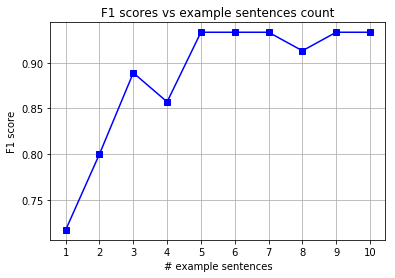

In [11]:
n_ex_sent_range = np.arange(1, N_EXAMPLES+1)
fig = plt.figure()
plt.plot(n_ex_sent_range, f1_scores, c='b', marker='s')
plt.xticks(n_ex_sent_range)
plt.xlabel('# example sentences')
plt.ylabel('F1 score')
plt.title('F1 scores vs example sentences count')
plt.grid()